In [1]:
import copy

import matplotlib.pyplot as plt
import numpy as np
import scanpy as sc
import pandas as pd
from algorithms import *
from data_gen import *
from spectrum_gen import *
from visualizations import *
from analysis import *
import random



<h1>Figure A, reconstruction</h1>
Simulate cyclic gene expression matrix, shuffle the rows and apply the reconstruction algorithm to order the rows according to cyclic ordering.

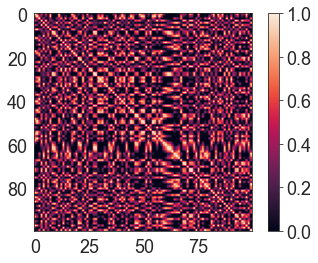

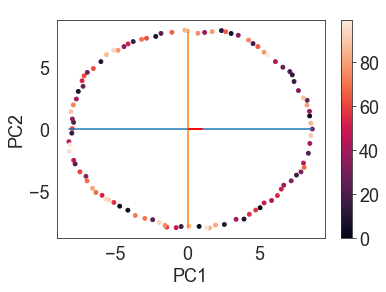

Iteration number: 
0
 function value= 
1.391453627554541e-26
Iteration number: 
25
 function value= 
812.0743290952845
Iteration number: 
50
 function value= 
834.7226969581574
Iteration number: 
75
 function value= 
840.5041188282331


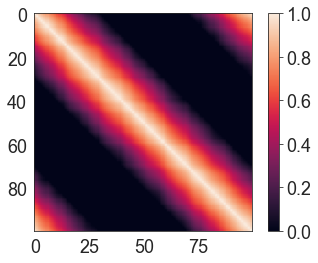

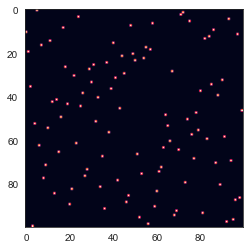

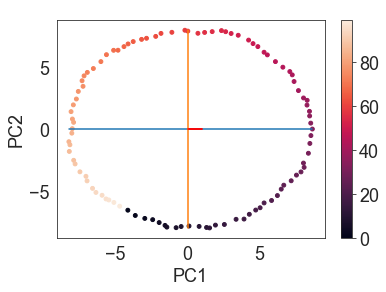

In [3]:
##Figure A, reconstruction
A = simulate_spatial_cyclic(ngenes=500,ncells=100,w=0.3)
np.random.shuffle(A)
plot_covariance_matrix(cell_normalization(A),title="Covariance matrix - shuffled cyclic signal")
ranged_pca_2d(A,range(A.shape[0]),title=" ")
E , E_rec = sga_m_reorder_rows_matrix(A,iterNum=100,batch_size=90)
plot_covariance_matrix(cell_normalization(E_rec.dot(A)),title="Covariance matrix - reordered cyclic signal")
plt.imshow(E_rec)
plt.show()
ranged_pca_2d(E_rec.dot(A),range(A.shape[0]),title=" ")

<h1>Figure B, reconstruction</h1>
Accuracy of the reconstruction algorithm as a function of the amount of Gaussian noise we add to the cyclic signal.

In [4]:
##Figure B, reconstruction
noise_list =[]

corr_list = []
snr_list = []
T = simulate_spatial_cyclic(ngenes=500,ncells=100,w=0.3)
t_norm = np.linalg.norm(T)
for i in range(300):
        print("Iteration number: " + str(i))
        noise = np.random.normal(0,0.3 + i*0.02,(T.shape))
        noise = np.clip(noise,0,np.inf)
        K = T + noise
        E_sga  , E_rec_sga = reconstruction_cyclic(K,iterNum=100 , verbose=False)
        res = spearm(E_rec_sga,np.array(range(K.shape[0])))
        corr_list.append(res)
        noise_list.append(0.3 + i*0.02)
        print(res)
        noise_norm = np.linalg.norm(noise)
        snr = t_norm/noise_norm
        snr_list.append(snr)


Iteration number: 0
0.9999759975997599
Iteration number: 1
0.9999399939993997
Iteration number: 2
0.9684488448844883
Iteration number: 3
0.9999519951995199
Iteration number: 4
0.9999519951995199
Iteration number: 5
0.99996399639964
Iteration number: 6
0.9998919891989198
Iteration number: 7
0.9997599759975996
Iteration number: 8
0.9998919891989198
Iteration number: 9
0.9417101710171015
Iteration number: 10
0.9638643864386437
Iteration number: 11
0.9997119711971196
Iteration number: 12
0.9998799879987997
Iteration number: 13
0.9997719771977197
Iteration number: 14
0.9998919891989198
Iteration number: 15
0.9996639663966396
Iteration number: 16
0.9998559855985597
Iteration number: 17
0.9998199819981998
Iteration number: 18
0.9784818481848184
Iteration number: 19
0.9917911791179117
Iteration number: 20
0.9997239723972396
Iteration number: 21
0.9995679567956794
Iteration number: 22
0.9805820582058206
Iteration number: 23
0.9996279627962795
Iteration number: 24
0.9413021302130211
Iteration nu

0.5189798979897989
Iteration number: 204
0.6146534653465346
Iteration number: 205
0.5732733273327332
Iteration number: 206
0.6522892289228922
Iteration number: 207
0.6292709270927092
Iteration number: 208
0.5766816681668165
Iteration number: 209
0.46221422142214214
Iteration number: 210
0.4849684968496849
Iteration number: 211
0.6231263126312632
Iteration number: 212
0.7239483948394839
Iteration number: 213
0.7958955895589559
Iteration number: 214
0.4517611761176117
Iteration number: 215
0.739105910591059
Iteration number: 216
0.6194419441944193
Iteration number: 217
0.5609000900090009
Iteration number: 218
0.5583438343834383
Iteration number: 219
0.4393159315931593
Iteration number: 220
0.48075607560756073
Iteration number: 221
0.5461986198619861
Iteration number: 222
0.7033663366336632
Iteration number: 223
0.6597059705970597
Iteration number: 224
0.6745754575457545
Iteration number: 225
0.651089108910891
Iteration number: 226
0.7580078007800779
Iteration number: 227
0.66502250225022

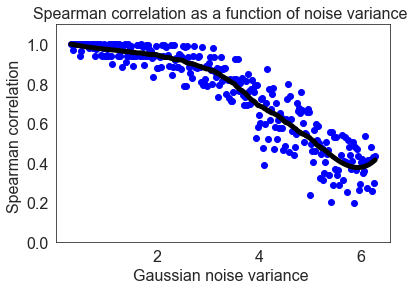

/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_10060/3711121518.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(snr_list,corr_list, 'bo',color='r')


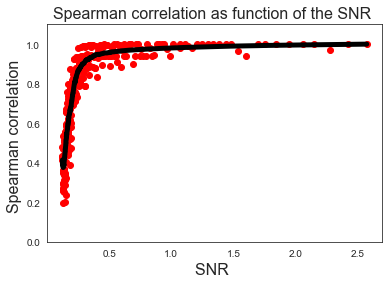

/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_10060/3711121518.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot((np.array(snr_list)),(np.array(corr_list)), 'bo',color='b')


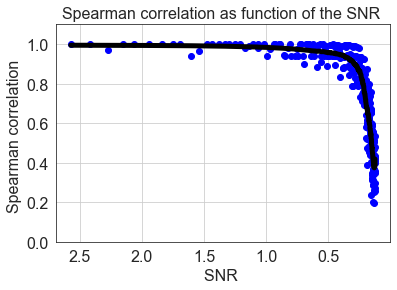

In [6]:
plt.plot(noise_list,corr_list, 'bo', noise_list,savgol_filter(np.array(corr_list),101,3), 'k', linewidth=5.0)
plt.title("Spearman correlation as a function of noise variance ",  fontsize=16)
plt.xlabel("Gaussian noise variance ",  fontsize=16)
plt.ylabel("Spearman correlation ",  fontsize=16)
plt.tick_params(labelsize=16)
plt.ylim(0, 1.1)
plt.show()
plt.plot(snr_list,corr_list, 'bo',color='r')
plt.plot( snr_list,savgol_filter(np.array(corr_list),101,3), 'k', linewidth=5.0)
plt.title("Spearman correlation as function of the SNR ",  fontsize=16)
plt.xlabel("SNR ",  fontsize=16)
plt.ylabel("Spearman correlation ",  fontsize=16)
plt.ylim(0, 1.1)
plt.show()
fig, ax = plt.subplots()

ax.plot((np.array(snr_list)),(np.array(corr_list)), 'bo',color='b')
ax.plot( (np.array(snr_list)),savgol_filter(np.array((np.array(corr_list))),97,3), 'k', linewidth=5.0)
ax.set_xlabel("SNR " ,  fontsize=16)
ax.set_ylabel("Spearman correlation " ,  fontsize=16)
ax.set_title("Spearman correlation as function of the SNR " ,  fontsize=16)
plt.tick_params(labelsize=16)
ax.grid(True)
ax.invert_xaxis()
plt.ylim(0, 1.1)

plt.show()


<h1>Figure C, genes inference</h1>
Accuracy of the genes inference algorithm as a function of the amount of Gaussian noise we add.
We simulate 250 "lineage" genes and 250 cyclic genes, and apply the genes inference algorithm with variable amount of Gaussian noise.


In [7]:


##Figure C, inference
B = tree_array(m=4,p=250,b=8)
B = np.clip(B,a_max=1,a_min=0)
np.random.shuffle(B)
A = simulate_spatial_cyclic(ngenes=500,ncells=B.shape[0],w=0.2)
A[:,250:500] = B
y_true = np.zeros(500)
y_true[250:500]=np.ones(250)
noise_list =[]
auc_list = []
snr_list = []
T=A
t_norm = np.linalg.norm(T)

for i in range(400):
        print("Iteration number: " + str(i))
        noise = np.random.normal(0,0.3 + i*0.02,(T.shape))
        noise = np.clip(noise,0,np.inf)
        K = T + noise
        D = filter_cyclic_genes(K, regu =0 , iterNum=20)
        res = np.diagonal(D)
        print(" AUC-ROC: " + str(calculate_roc_auc(res,y_true)) )
        auc_list.append(calculate_roc_auc(res,y_true))
        noise_list.append(0.3 + i*0.02)
        noise_norm = np.linalg.norm(noise)
        snr = t_norm/noise_norm
        snr_list.append(snr)





Iteration number: 0
Iteration number: 
1
function value= 
6.972004769994725
 AUC-ROC: 1.0
Iteration number: 1
Iteration number: 
1
function value= 
6.75299650294901
 AUC-ROC: 1.0
Iteration number: 2
Iteration number: 
1
function value= 
6.901160647134887
 AUC-ROC: 1.0
Iteration number: 3
Iteration number: 
1
function value= 
6.861005053738627
 AUC-ROC: 1.0
Iteration number: 4
Iteration number: 
1
function value= 
6.645463473099164
 AUC-ROC: 1.0
Iteration number: 5
Iteration number: 
1
function value= 
6.714452814909032
 AUC-ROC: 1.0
Iteration number: 6
Iteration number: 
1
function value= 
7.116767771290638
 AUC-ROC: 1.0
Iteration number: 7
Iteration number: 
1
function value= 
6.800750304293292
 AUC-ROC: 1.0
Iteration number: 8
Iteration number: 
1
function value= 
6.985047404600779
 AUC-ROC: 1.0
Iteration number: 9
Iteration number: 
1
function value= 
7.698436595117721
 AUC-ROC: 1.0
Iteration number: 10
Iteration number: 
1
function value= 
7.819756679008599
 AUC-ROC: 1.0
Iteration 

Iteration number: 
1
function value= 
53.49798268718711
 AUC-ROC: 0.9939359999999999
Iteration number: 88
Iteration number: 
1
function value= 
53.259171057871114
 AUC-ROC: 0.9901599999999999
Iteration number: 89
Iteration number: 
1
function value= 
53.2574497877417
 AUC-ROC: 0.988768
Iteration number: 90
Iteration number: 
1
function value= 
54.12622367786458
 AUC-ROC: 0.991792
Iteration number: 91
Iteration number: 
1
function value= 
53.631376674324855
 AUC-ROC: 0.993936
Iteration number: 92
Iteration number: 
1
function value= 
53.14273325951146
 AUC-ROC: 0.988624
Iteration number: 93
Iteration number: 
1
function value= 
52.43137995807159
 AUC-ROC: 0.984256
Iteration number: 94
Iteration number: 
1
function value= 
52.37847999152668
 AUC-ROC: 0.982496
Iteration number: 95
Iteration number: 
1
function value= 
53.552578223466476
 AUC-ROC: 0.985616
Iteration number: 96
Iteration number: 
1
function value= 
52.68574984420838
 AUC-ROC: 0.9905280000000001
Iteration number: 97
Iteratio

Iteration number: 
1
function value= 
46.30038682933288
 AUC-ROC: 0.8462560000000001
Iteration number: 170
Iteration number: 
1
function value= 
47.1203274610706
 AUC-ROC: 0.859344
Iteration number: 171
Iteration number: 
1
function value= 
44.09334580417227
 AUC-ROC: 0.853104
Iteration number: 172
Iteration number: 
1
function value= 
47.803261596623756
 AUC-ROC: 0.874176
Iteration number: 173
Iteration number: 
1
function value= 
49.312317429250186
 AUC-ROC: 0.867888
Iteration number: 174
Iteration number: 
1
function value= 
46.91278016496993
 AUC-ROC: 0.881664
Iteration number: 175
Iteration number: 
1
function value= 
47.799659241662724
 AUC-ROC: 0.8600319999999999
Iteration number: 176
Iteration number: 
1
function value= 
47.1226240003224
 AUC-ROC: 0.88272
Iteration number: 177
Iteration number: 
1
function value= 
45.374938055046094
 AUC-ROC: 0.8522879999999999
Iteration number: 178
Iteration number: 
1
function value= 
45.46583431442727
 AUC-ROC: 0.83048
Iteration number: 179


Iteration number: 
1
function value= 
44.470063823084786
 AUC-ROC: 0.74192
Iteration number: 251
Iteration number: 
1
function value= 
44.86741850881223
 AUC-ROC: 0.7546080000000001
Iteration number: 252
Iteration number: 
1
function value= 
43.8816760529864
 AUC-ROC: 0.7244639999999999
Iteration number: 253
Iteration number: 
1
function value= 
44.063541704122926
 AUC-ROC: 0.724912
Iteration number: 254
Iteration number: 
1
function value= 
44.91949298228578
 AUC-ROC: 0.760768
Iteration number: 255
Iteration number: 
1
function value= 
42.47802501072893
 AUC-ROC: 0.714496
Iteration number: 256
Iteration number: 
1
function value= 
43.64144494533285
 AUC-ROC: 0.7374879999999999
Iteration number: 257
Iteration number: 
1
function value= 
43.558697231334826
 AUC-ROC: 0.748288
Iteration number: 258
Iteration number: 
1
function value= 
43.99496526363024
 AUC-ROC: 0.7301279999999999
Iteration number: 259
Iteration number: 
1
function value= 
43.628324070911205
 AUC-ROC: 0.7535999999999999


Iteration number: 
1
function value= 
44.08160422939065
 AUC-ROC: 0.6568639999999999
Iteration number: 332
Iteration number: 
1
function value= 
42.777571962951114
 AUC-ROC: 0.65
Iteration number: 333
Iteration number: 
1
function value= 
42.416065465021546
 AUC-ROC: 0.674064
Iteration number: 334
Iteration number: 
1
function value= 
42.479426327257414
 AUC-ROC: 0.665408
Iteration number: 335
Iteration number: 
1
function value= 
42.3910844938401
 AUC-ROC: 0.654544
Iteration number: 336
Iteration number: 
1
function value= 
42.84672765781315
 AUC-ROC: 0.6964159999999999
Iteration number: 337
Iteration number: 
1
function value= 
43.2619647232322
 AUC-ROC: 0.68528
Iteration number: 338
Iteration number: 
1
function value= 
42.6702016381215
 AUC-ROC: 0.62256
Iteration number: 339
Iteration number: 
1
function value= 
43.728298076403206
 AUC-ROC: 0.651552
Iteration number: 340
Iteration number: 
1
function value= 
42.77081107245505
 AUC-ROC: 0.68928
Iteration number: 341
Iteration number

/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_10060/94379892.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot((np.array(noise_list)),auc_list, 'bo',color='r')


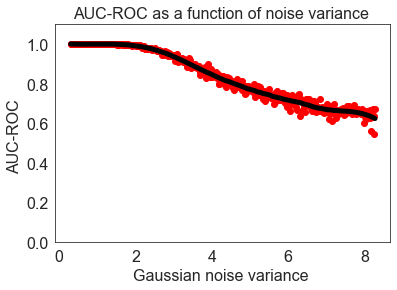

/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_10060/94379892.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot((np.array(snr_list)),(np.array(auc_list)), 'bo',color='b')


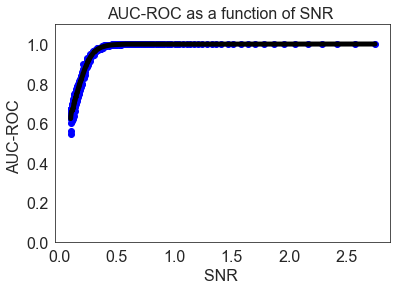

/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_10060/94379892.py:23: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot((np.array(snr_list)),(np.array(auc_list)), 'bo',color='r')


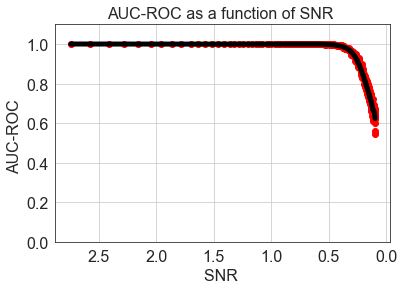

In [8]:
plt.plot((np.array(noise_list)),auc_list, 'bo',color='r')
plt.plot( (np.array(noise_list)),savgol_filter(np.array(auc_list),97,3), 'k', linewidth=5.0)
plt.title("AUC-ROC as a function of noise variance ",  fontsize=16)
plt.xlabel("Gaussian noise variance ",  fontsize=16)
plt.ylabel("AUC-ROC ",  fontsize=16)
plt.tick_params(labelsize=16)
plt.ylim(0, 1.1)
plt.show()


plt.plot((np.array(snr_list)),(np.array(auc_list)), 'bo',color='b')
plt.plot( (np.array(snr_list)),savgol_filter(np.array((np.array(auc_list))),97,3), 'k', linewidth=5.0)
plt.title("AUC-ROC as a function of SNR ",  fontsize=16)
plt.xlabel("SNR ",  fontsize=16)
plt.ylabel("AUC-ROC ",  fontsize=16)
plt.tick_params(labelsize=16)
plt.ylim(0, 1.1)
plt.show()

fig, ax = plt.subplots()


ax.plot((np.array(snr_list)),(np.array(auc_list)), 'bo',color='r')
ax.plot( (np.array(snr_list)),savgol_filter(np.array((np.array(auc_list))),97,3), 'k', linewidth=5.0)
ax.set_xlabel("SNR ",  fontsize=16)
ax.set_ylabel("AUC-ROC ",  fontsize=16)
ax.set_title("AUC-ROC as a function of SNR ",  fontsize=16)
ax.grid(True)
ax.invert_xaxis()
plt.tick_params(labelsize=16)
plt.ylim(0, 1.1)
plt.show()



<h1>Linear genes inference</h1>
Accuracy of the genes inference algorithm as a function of the amount of Gaussian noise we add.
We simulate 250 "lineage" genes and 250 linear genes, and apply the genes inference algorithm with variable amount of Gaussian noise.


In [9]:
## Inference linear
B = tree_array(m=4,p=250,b=8)
B = np.clip(B,a_max=1,a_min=0)
np.random.shuffle(B)
A = simulate_window_linear(ngenes=500,ncells=B.shape[0],w=0.3)
A[:,250:500] = B
y_true = np.zeros(500)
y_true[250:500]=np.ones(250)
noise_list =[]
auc_list = []
snr_list = []
T=A
t_norm = np.linalg.norm(T)

for i in range(300):
        print("Iteration number: " + str(i))
        noise = np.random.normal(0,0.3 + i*0.02,(T.shape))
        noise = np.clip(noise,0,np.inf)
        K = T + noise
        D = filter_linear_genes(K, regu =0 , iterNum=20 , method='numeric')
        res = np.diagonal(D)
        print(" AUC-ROC: " + str(calculate_roc_auc(res,y_true)) )
        auc_list.append(calculate_roc_auc(res,y_true))
        noise_list.append(0.3 + i*0.02)
        noise_norm = np.linalg.norm(noise)
        snr = t_norm/noise_norm
        snr_list.append(snr)






Iteration number: 0


/Users/jonathankarin/PycharmProjects/scPrisma_rev/algorithms.py:344: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float64, 2d, C), array(float64, 2d, A))
  ATUUTA = (2 * ((((A.T).dot(U)).dot(U.T)).dot(A)))#.dot(D)) - regu*np.sign(D)#((1 / t_0) * ((A.T).dot(A)).dot(D))
/Users/jonathankarin/PycharmProjects/scPrisma_rev/algorithms.py:344: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float64, 2d, F), array(float64, 2d, A))
  ATUUTA = (2 * ((((A.T).dot(U)).dot(U.T)).dot(A)))#.dot(D)) - regu*np.sign(D)#((1 / t_0) * ((A.T).dot(A)).dot(D))
/Users/jonathankarin/PycharmProjects/scPrisma_rev/algorithms.py:348: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (array(float64, 2d, A), array(float64, 2d, C))
  val = np.trace((((((U.T).dot(A)).dot(D)).dot(D.T)).dot(A.T)).dot(U)) - regu*np.linalg.norm(D,1)


Iteration number: 
1
function value= 
20.07585020097804
 AUC-ROC: 0.996288
Iteration number: 1
Iteration number: 
1
function value= 
21.256145597804803
 AUC-ROC: 0.994288
Iteration number: 2
Iteration number: 
1
function value= 
23.40428884820085
 AUC-ROC: 0.994112
Iteration number: 3
Iteration number: 
1
function value= 
23.735865877244994
 AUC-ROC: 0.992928
Iteration number: 4
Iteration number: 
1
function value= 
27.081368082237226
 AUC-ROC: 0.997504
Iteration number: 5
Iteration number: 
1
function value= 
28.738178259195042
 AUC-ROC: 0.9931519999999999
Iteration number: 6
Iteration number: 
1
function value= 
31.53712707449834
 AUC-ROC: 0.9953919999999999
Iteration number: 7
Iteration number: 
1
function value= 
32.438420901703935
 AUC-ROC: 0.99664
Iteration number: 8
Iteration number: 
1
function value= 
34.36627333740397
 AUC-ROC: 0.9959199999999999
Iteration number: 9
Iteration number: 
1
function value= 
36.46675198247057
 AUC-ROC: 0.992528
Iteration number: 10
Iteration numbe

Iteration number: 
1
function value= 
27.81761301598554
 AUC-ROC: 0.9459040000000001
Iteration number: 84
Iteration number: 
1
function value= 
27.34890649084539
 AUC-ROC: 0.953104
Iteration number: 85
Iteration number: 
1
function value= 
27.935476197947203
 AUC-ROC: 0.94976
Iteration number: 86
Iteration number: 
1
function value= 
27.923597249914433
 AUC-ROC: 0.9625439999999998
Iteration number: 87
Iteration number: 
1
function value= 
27.453201915459083
 AUC-ROC: 0.9433119999999999
Iteration number: 88
Iteration number: 
1
function value= 
27.39597053940827
 AUC-ROC: 0.958672
Iteration number: 89
Iteration number: 
1
function value= 
28.159861443606886
 AUC-ROC: 0.956048
Iteration number: 90
Iteration number: 
1
function value= 
29.498028844652218
 AUC-ROC: 0.95872
Iteration number: 91
Iteration number: 
1
function value= 
27.803424379334924
 AUC-ROC: 0.952656
Iteration number: 92
Iteration number: 
1
function value= 
27.06806760522693
 AUC-ROC: 0.9499040000000001
Iteration number:

Iteration number: 
1
function value= 
25.985778755809694
 AUC-ROC: 0.817232
Iteration number: 166
Iteration number: 
1
function value= 
26.49289686800484
 AUC-ROC: 0.862464
Iteration number: 167
Iteration number: 
1
function value= 
26.765466769058758
 AUC-ROC: 0.815152
Iteration number: 168
Iteration number: 
1
function value= 
24.76131833228409
 AUC-ROC: 0.84168
Iteration number: 169
Iteration number: 
1
function value= 
26.18362414666797
 AUC-ROC: 0.8272
Iteration number: 170
Iteration number: 
1
function value= 
27.020558883498158
 AUC-ROC: 0.82408
Iteration number: 171
Iteration number: 
1
function value= 
26.093713372692612
 AUC-ROC: 0.80472
Iteration number: 172
Iteration number: 
1
function value= 
26.800907592415182
 AUC-ROC: 0.8265600000000001
Iteration number: 173
Iteration number: 
1
function value= 
24.60347988886131
 AUC-ROC: 0.819968
Iteration number: 174
Iteration number: 
1
function value= 
26.86006289835456
 AUC-ROC: 0.8381919999999999
Iteration number: 175
Iteration 

Iteration number: 
1
function value= 
25.27520051559738
 AUC-ROC: 0.7844479999999999
Iteration number: 248
Iteration number: 
1
function value= 
25.522126577234033
 AUC-ROC: 0.7441279999999999
Iteration number: 249
Iteration number: 
1
function value= 
26.22747823057976
 AUC-ROC: 0.688672
Iteration number: 250
Iteration number: 
1
function value= 
26.498080566844312
 AUC-ROC: 0.663584
Iteration number: 251
Iteration number: 
1
function value= 
27.31319953124098
 AUC-ROC: 0.7406879999999999
Iteration number: 252
Iteration number: 
1
function value= 
25.072872975672816
 AUC-ROC: 0.685392
Iteration number: 253
Iteration number: 
1
function value= 
25.564212788356762
 AUC-ROC: 0.703104
Iteration number: 254
Iteration number: 
1
function value= 
26.60575545987895
 AUC-ROC: 0.695568
Iteration number: 255
Iteration number: 
1
function value= 
26.680190867688818
 AUC-ROC: 0.689376
Iteration number: 256
Iteration number: 
1
function value= 
26.30767620764637
 AUC-ROC: 0.670768
Iteration number:

/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_10060/390714363.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot((np.array(noise_list)),auc_list, 'bo',color='purple')


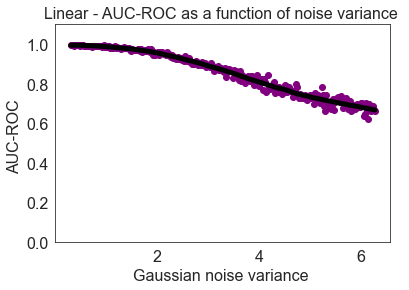

/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_10060/390714363.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot((np.array(snr_list)),(np.array(auc_list)), 'bo',color='g')


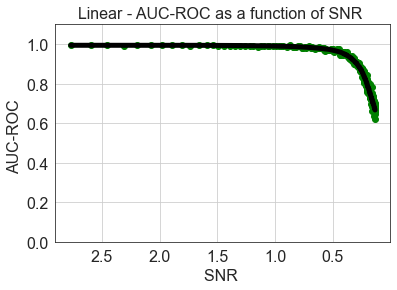

In [10]:

plt.plot((np.array(noise_list)),auc_list, 'bo',color='purple')
plt.plot( (np.array(noise_list)),savgol_filter(np.array(auc_list),97,3), 'k', linewidth=5.0)
plt.title("Linear - AUC-ROC as a function of noise variance ",  fontsize=16)
plt.xlabel("Gaussian noise variance ",  fontsize=16)
plt.ylabel("AUC-ROC ",  fontsize=16)
plt.tick_params(labelsize=16)
plt.ylim(0, 1.1)
plt.show()



fig, ax = plt.subplots()


ax.plot((np.array(snr_list)),(np.array(auc_list)), 'bo',color='g')
ax.plot( (np.array(snr_list)),savgol_filter(np.array((np.array(auc_list))),97,3), 'k', linewidth=5.0)
ax.set_xlabel("SNR ",  fontsize=16)
ax.set_ylabel("AUC-ROC " ,  fontsize=16)
ax.set_title("Linear - AUC-ROC as a function of SNR " , fontsize=16)
plt.tick_params(labelsize=16)
ax.grid(True)
ax.invert_xaxis()
plt.ylim(0, 1.1)

plt.show()


<h1>Genes inference as a function of number of cyclic</h1>
Accuracy of the genes inference algorithm as a function of the amount of cycluc genes.
We simulate X "lineage" genes and 500-X cyclic genes, and apply the genes inference algorithm with constant amount of Gaussian noise.


Iteration number: 
0
 function value= 
1.9066479856875547e-25
Iteration number: 
25
 function value= 
0.013816447002501984
Iteration number: 
1
function value= 
17.740132664697672
 AUC-ROC: 0.4602020202020202
Iteration number: 
0
 function value= 
1.8923592652911553e-25
Iteration number: 
25
 function value= 
4.38804729165537
Iteration number: 
1
function value= 
15.643714471758503
 AUC-ROC: 0.5475510204081633
Iteration number: 
0
 function value= 
1.907366774140159e-25
Iteration number: 
25
 function value= 
0.0009131562667881913
Iteration number: 
1
function value= 
16.313168896390806
 AUC-ROC: 0.5417182130584193
Iteration number: 
0
 function value= 
1.9961419897642638e-25
Iteration number: 
25
 function value= 
0.5359478018467273
Iteration number: 
1
function value= 
18.63712149313794
 AUC-ROC: 0.5475
Iteration number: 
0
 function value= 
2.0346099876450884e-25
Iteration number: 
25
 function value= 
0.007427989985731361
Iteration number: 
1
function value= 
19.175727057427245
 AU

Iteration number: 
1
function value= 
6.810074752842365
 AUC-ROC: 1.0
Iteration number: 
0
 function value= 
4.0475368543260357e-25
Iteration number: 
25
 function value= 
482.81916981645514
Iteration number: 
1
function value= 
7.018066602285147
 AUC-ROC: 1.0
Iteration number: 
0
 function value= 
4.142554180323903e-25
Iteration number: 
25
 function value= 
443.7954083211602
Iteration number: 
1
function value= 
6.757918087246113
 AUC-ROC: 1.0
Iteration number: 
0
 function value= 
4.204958066078809e-25
Iteration number: 
25
 function value= 
521.5267838364828
Iteration number: 
1
function value= 
7.214590342471345
 AUC-ROC: 1.0
Iteration number: 
0
 function value= 
4.349521329384409e-25
Iteration number: 
25
 function value= 
541.5345490232055
Iteration number: 
1
function value= 
6.975321053332458
 AUC-ROC: 1.0
Iteration number: 
0
 function value= 
4.399665148263614e-25
Iteration number: 
25
 function value= 
591.4733274930085
Iteration number: 
1
function value= 
6.8337445255010

Iteration number: 
0
 function value= 
4.693905788531099e-25
Iteration number: 
25
 function value= 
3390.7826393216255
Iteration number: 
1
function value= 
3.422396743590437
 AUC-ROC: 1.0
Iteration number: 
0
 function value= 
4.565023845015237e-25
Iteration number: 
25
 function value= 
3298.6704839390063
Iteration number: 
1
function value= 
3.271084195138978
 AUC-ROC: 1.0
Iteration number: 
0
 function value= 
4.457977830328894e-25
Iteration number: 
25
 function value= 
3588.886193654635
Iteration number: 
1
function value= 
3.012106831226305
 AUC-ROC: 1.0
Iteration number: 
0
 function value= 
4.178337024836302e-25
Iteration number: 
25
 function value= 
3495.683482958387
Iteration number: 
1
function value= 
2.715771851497548
 AUC-ROC: 1.0
Iteration number: 
0
 function value= 
4.185384907119676e-25
Iteration number: 
25
 function value= 
3924.2524317086104
Iteration number: 
1
function value= 
2.7353359543797025
 AUC-ROC: 1.0
Iteration number: 
0
 function value= 
3.8958202984

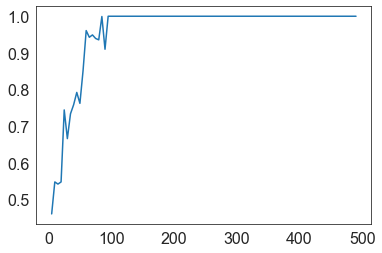

In [11]:
## AUC-ROC as a function of number of cyclic genes
B = tree_array(m=4,p=500,b=8)
B = np.clip(B,a_max=1,a_min=0)
np.random.shuffle(B)
A = simulate_spatial_cyclic(ngenes=500,ncells=B.shape[0],w=0.2)
genes_num_list =[]
auc_list = []
for i in range(1,99):
    T = copy.deepcopy(A)
    T[:,i*5:500]=B[:,i*5:500]
    y_true = np.zeros(500)
    y_true[i*5:500]=np.ones(500-i*5)
    K = T 
    E_sga  , E_rec_sga = reconstruction_cyclic(K , iterNum=50)
    K = E_rec_sga.dot(K)
    D = filter_cyclic_genes(K, regu =0 , iterNum=20)
    res = np.diagonal(D)
    print(" AUC-ROC: " + str(calculate_roc_auc(res,y_true)) )
    auc_list.append(calculate_roc_auc(res,y_true))
    genes_num_list.append(i*5)

auc_a = np.array(auc_list)
genes_num_list = np.array(genes_num_list)
plt.plot(genes_num_list, auc_a)
plt.tick_params(labelsize=16)
plt.show()


/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_10060/348061306.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot((np.array(genes_num_list)),(np.array(auc_list)), 'bo',color='y')


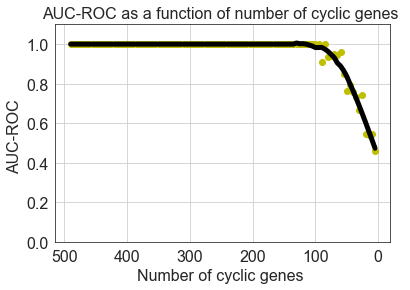

In [12]:
fig, ax = plt.subplots()

ax.plot((np.array(genes_num_list)),(np.array(auc_list)), 'bo',color='y')
ax.plot( (np.array(genes_num_list)),savgol_filter(np.array((np.array(auc_list))),17,3), 'k', linewidth=5.0)
ax.set_xlabel("Number of cyclic genes ", fontsize=16)
ax.set_ylabel("AUC-ROC ", fontsize=16)
ax.set_title("AUC-ROC as a function of number of cyclic genes ", fontsize=16)
plt.tick_params(labelsize=16)
ax.grid(True)
ax.invert_xaxis()
plt.ylim(0, 1.1)
plt.show()


/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_10060/3759315042.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(500-genes_num_list,auc_a, 'bo',color='y')


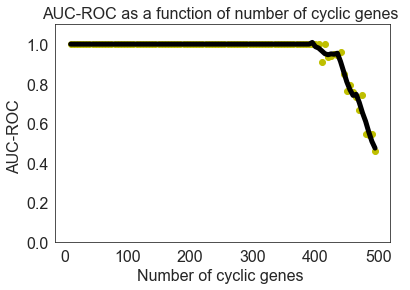

In [13]:
plt.plot(500-genes_num_list,auc_a, 'bo',color='y')
plt.plot( 500-genes_num_list,savgol_filter(np.array(auc_a),7,3), 'k', linewidth=5.0)
plt.title("AUC-ROC as a function of number of cyclic genes ", fontsize=16)
plt.xlabel("Number of cyclic genes ", fontsize=16)
plt.ylabel("AUC-ROC ", fontsize=16)
plt.tick_params(labelsize=16)
plt.ylim(0, 1.1)
plt.show()


<h1>Enhancement algorithm</h1>
Accuracy of the enhancement algorithm as a function of the amount of Gaussian noise we add.


Iteration number: 0
Iteration number: 
1
function value: 
756.0356422810472
Iteration number: 
26
function value: 
764.9143281559919
Iteration number: 
51
function value: 
772.8060760144234
Iteration number: 
76
function value: 
779.8209855862332
Iteration number: 
101
function value: 
786.0480528793424
Iteration number: 
126
function value: 
791.57151106418
Iteration number: 
151
function value: 
796.464076742117
Iteration number: 
176
function value: 
800.8031333288986
Iteration number: 
201
function value: 
804.6418517184575
Iteration number: 
226
function value: 
808.0257751827295
Iteration number: 
251
function value: 
810.9497102078446
Iteration number: 
276
function value: 
813.4072429071896
8.999868080329879
Iteration number: 1
Iteration number: 
1
function value: 
746.9066828913786
Iteration number: 
26
function value: 
756.6913889752223
Iteration number: 
51
function value: 
765.4057728607299
Iteration number: 
76
function value: 
773.1528140062978
Iteration number: 
101
func

Iteration number: 
101
function value: 
718.5214880132951
Iteration number: 
126
function value: 
730.2071503822987
Iteration number: 
151
function value: 
740.5579541135271
Iteration number: 
176
function value: 
749.3911206087879
Iteration number: 
201
function value: 
756.5669629669513
Iteration number: 
226
function value: 
762.1294045643633
Iteration number: 
251
function value: 
766.2527234685941
Iteration number: 
276
function value: 
769.240009285521
18.940531060078715
Iteration number: 12
Iteration number: 
1
function value: 
648.4934890690893
Iteration number: 
26
function value: 
667.0925828832252
Iteration number: 
51
function value: 
683.9268358765864
Iteration number: 
76
function value: 
699.0934323414549
Iteration number: 
101
function value: 
712.7222170812518
Iteration number: 
126
function value: 
724.9109479820331
Iteration number: 
151
function value: 
735.6890111547316
Iteration number: 
176
function value: 
744.8678162721277
Iteration number: 
201
function value:

Iteration number: 
201
function value: 
697.2729679749679
Iteration number: 
226
function value: 
703.21156101934
Iteration number: 
251
function value: 
707.2940662628321
Iteration number: 
276
function value: 
710.0290877332994
29.03741207953163
Iteration number: 23
Iteration number: 
1
function value: 
549.7409000234297
Iteration number: 
26
function value: 
574.8923824324917
Iteration number: 
51
function value: 
598.1139878347329
Iteration number: 
76
function value: 
619.4018240096885
Iteration number: 
101
function value: 
638.7928119955559
Iteration number: 
126
function value: 
656.1643100897446
Iteration number: 
151
function value: 
670.8602853243146
Iteration number: 
176
function value: 
682.3204098385446
Iteration number: 
201
function value: 
690.6672124594569
Iteration number: 
226
function value: 
696.5265678564577
Iteration number: 
251
function value: 
700.5048214636379
Iteration number: 
276
function value: 
703.2055272644765
30.160176244643328
Iteration number: 24


39.653143059733765
Iteration number: 34
Iteration number: 
1
function value: 
461.0223032885635
Iteration number: 
26
function value: 
490.0003879122278
Iteration number: 
51
function value: 
517.3731388717429
Iteration number: 
76
function value: 
542.9432676899033
Iteration number: 
101
function value: 
566.5893463785819
Iteration number: 
126
function value: 
587.4810264585674
Iteration number: 
151
function value: 
604.1468833410642
Iteration number: 
176
function value: 
616.3596160509287
Iteration number: 
201
function value: 
624.8738467545925
Iteration number: 
226
function value: 
630.6216324365946
Iteration number: 
251
function value: 
634.4273212786976
Iteration number: 
276
function value: 
636.8608639137636
40.186730685786415
Iteration number: 35
Iteration number: 
1
function value: 
453.8005017334872
Iteration number: 
26
function value: 
482.78067164165003
Iteration number: 
51
function value: 
510.22522798875843
Iteration number: 
76
function value: 
535.9015219836291


Iteration number: 
76
function value: 
478.68169421421146
Iteration number: 
101
function value: 
504.16810735877414
Iteration number: 
126
function value: 
526.523999816337
Iteration number: 
151
function value: 
543.9341545076336
Iteration number: 
176
function value: 
556.4059309542041
Iteration number: 
201
function value: 
564.792034494493
Iteration number: 
226
function value: 
570.2232077141333
Iteration number: 
251
function value: 
573.648323410084
Iteration number: 
276
function value: 
575.728816795269
51.1819045422131
Iteration number: 46
Iteration number: 
1
function value: 
387.0465888212376
Iteration number: 
26
function value: 
416.4023781025007
Iteration number: 
51
function value: 
444.9543045660425
Iteration number: 
76
function value: 
472.20898836931195
Iteration number: 
101
function value: 
497.73570791722034
Iteration number: 
126
function value: 
520.1115042080238
Iteration number: 
151
function value: 
537.5664379816207
Iteration number: 
176
function value: 


Iteration number: 
151
function value: 
484.27643380213516
Iteration number: 
176
function value: 
496.22626881486156
Iteration number: 
201
function value: 
504.04759512919975
Iteration number: 
226
function value: 
509.01515935331724
Iteration number: 
251
function value: 
512.0271427037244
Iteration number: 
276
function value: 
513.7582116139389
62.90624128982606
Iteration number: 57
Iteration number: 
1
function value: 
327.61938138526114
Iteration number: 
26
function value: 
354.6634126538093
Iteration number: 
51
function value: 
381.9076992251685
Iteration number: 
76
function value: 
408.546676287905
Iteration number: 
101
function value: 
433.7616514544542
Iteration number: 
126
function value: 
455.9331732035139
Iteration number: 
151
function value: 
473.4029712028216
Iteration number: 
176
function value: 
485.7926683257073
Iteration number: 
201
function value: 
493.9455385474894
Iteration number: 
226
function value: 
499.13492696049445
Iteration number: 
251
function v

Iteration number: 
226
function value: 
446.1194640027895
Iteration number: 
251
function value: 
448.4373170845623
Iteration number: 
276
function value: 
449.5745909495774
74.05419459689622
Iteration number: 68
Iteration number: 
1
function value: 
290.2562358182051
Iteration number: 
26
function value: 
313.9340072459618
Iteration number: 
51
function value: 
338.2441416552483
Iteration number: 
76
function value: 
362.5623354662115
Iteration number: 
101
function value: 
386.26464830125923
Iteration number: 
126
function value: 
407.0077489000149
Iteration number: 
151
function value: 
422.9484007251776
Iteration number: 
176
function value: 
433.9898886163122
Iteration number: 
201
function value: 
441.1017314934176
Iteration number: 
226
function value: 
445.3213857076967
Iteration number: 
251
function value: 
447.67608786597646
Iteration number: 
276
function value: 
448.8150670711656
74.80103051281955
Iteration number: 69
Iteration number: 
1
function value: 
283.4853162382389

Iteration number: 
276
function value: 
389.1220887870574
84.48218063760118
Iteration number: 79
Iteration number: 
1
function value: 
246.61396681193378
Iteration number: 
26
function value: 
266.41263565304695
Iteration number: 
51
function value: 
287.05462135267237
Iteration number: 
76
function value: 
308.02160418738254
Iteration number: 
101
function value: 
328.6928437191242
Iteration number: 
126
function value: 
346.96765138723913
Iteration number: 
151
function value: 
360.86536130321764
Iteration number: 
176
function value: 
370.16276141768765
Iteration number: 
201
function value: 
375.81744745450135
Iteration number: 
226
function value: 
378.7634423324774
Iteration number: 
251
function value: 
379.98937746648875
Iteration number: 
276
function value: 
380.13589752600313
86.11863985655852
Iteration number: 80
Iteration number: 
1
function value: 
256.6132115882542
Iteration number: 
26
function value: 
276.5388528314786
Iteration number: 
51
function value: 
297.2201341

Iteration number: 
51
function value: 
265.5056051679614
Iteration number: 
76
function value: 
284.477181511434
Iteration number: 
101
function value: 
303.01735879924206
Iteration number: 
126
function value: 
319.2340363240445
Iteration number: 
151
function value: 
331.52598894417673
Iteration number: 
176
function value: 
339.588653449414
Iteration number: 
201
function value: 
344.20103929404263
Iteration number: 
226
function value: 
346.33105822657075
Iteration number: 
251
function value: 
346.83111518280936
Iteration number: 
276
function value: 
346.3734668505297
97.16900179691049
Iteration number: 91
Iteration number: 
1
function value: 
214.57890153852284
Iteration number: 
26
function value: 
230.83311260729874
Iteration number: 
51
function value: 
248.01291799283905
Iteration number: 
76
function value: 
265.74370975526335
Iteration number: 
101
function value: 
283.2529021682981
Iteration number: 
126
function value: 
298.75412808093046
Iteration number: 
151
function 

Iteration number: 
101
function value: 
259.46586468513993
Iteration number: 
126
function value: 
273.4615158269583
Iteration number: 
151
function value: 
283.8623642303414
Iteration number: 
176
function value: 
290.63710545306765
Iteration number: 
201
function value: 
294.1138543003832
Iteration number: 
226
function value: 
295.27905940620224
Iteration number: 
251
function value: 
294.9653183156859
Iteration number: 
276
function value: 
293.7518671375149
107.5638976994885
Iteration number: 102
Iteration number: 
1
function value: 
198.14864122695047
Iteration number: 
26
function value: 
212.79605758946371
Iteration number: 
51
function value: 
228.45593282815597
Iteration number: 
76
function value: 
244.66711278331493
Iteration number: 
101
function value: 
260.69930064174315
Iteration number: 
126
function value: 
274.9060182323795
Iteration number: 
151
function value: 
285.6942199857247
Iteration number: 
176
function value: 
292.70749486305033
Iteration number: 
201
funct

Iteration number: 
176
function value: 
261.7727278416899
Iteration number: 
201
function value: 
264.9743461586571
Iteration number: 
226
function value: 
265.88142169791973
Iteration number: 
251
function value: 
265.2693218451704
Iteration number: 
276
function value: 
263.7831952438014
118.69580514589846
Iteration number: 113
Iteration number: 
1
function value: 
180.44525814561032
Iteration number: 
26
function value: 
193.5563627882174
Iteration number: 
51
function value: 
207.69403474061212
Iteration number: 
76
function value: 
222.48196827637653
Iteration number: 
101
function value: 
237.3471311601568
Iteration number: 
126
function value: 
250.73261019605405
Iteration number: 
151
function value: 
260.71574964107225
Iteration number: 
176
function value: 
266.95421325190887
Iteration number: 
201
function value: 
269.90005604303025
Iteration number: 
226
function value: 
270.6365677324368
Iteration number: 
251
function value: 
269.97144053526637
Iteration number: 
276
func

Iteration number: 
226
function value: 
237.2287584842385
Iteration number: 
251
function value: 
236.39506147305792
Iteration number: 
276
function value: 
234.74242457294253
127.4002523960607
Iteration number: 124
Iteration number: 
1
function value: 
160.54812794987586
Iteration number: 
26
function value: 
171.74462882176888
Iteration number: 
51
function value: 
183.93150500193175
Iteration number: 
76
function value: 
196.68429053594105
Iteration number: 
101
function value: 
209.44420652932283
Iteration number: 
126
function value: 
221.13012394716685
Iteration number: 
151
function value: 
230.10209694235823
Iteration number: 
176
function value: 
235.69638501801379
Iteration number: 
201
function value: 
238.29068344255478
Iteration number: 
226
function value: 
238.72456219748662
Iteration number: 
251
function value: 
237.8397967831576
Iteration number: 
276
function value: 
236.1789245446925
129.19409852846505
Iteration number: 125
Iteration number: 
1
function value: 
156.

Iteration number: 
276
function value: 
224.04685685907558
138.0897885776134
Iteration number: 135
Iteration number: 
1
function value: 
143.6557059884677
Iteration number: 
26
function value: 
153.54555732094073
Iteration number: 
51
function value: 
164.46526158367902
Iteration number: 
76
function value: 
176.0364293953673
Iteration number: 
101
function value: 
187.85327347423203
Iteration number: 
126
function value: 
198.68374015699345
Iteration number: 
151
function value: 
207.04238232307029
Iteration number: 
176
function value: 
212.33013438741165
Iteration number: 
201
function value: 
214.808756841971
Iteration number: 
226
function value: 
215.27897609136417
Iteration number: 
251
function value: 
214.41689105750083
Iteration number: 
276
function value: 
212.7139200002282
137.54852824860578
Iteration number: 136
Iteration number: 
1
function value: 
144.28508482190404
Iteration number: 
26
function value: 
154.46541625408562
Iteration number: 
51
function value: 
165.7040

Iteration number: 
1
function value: 
134.9398401135948
Iteration number: 
26
function value: 
144.08898321646612
Iteration number: 
51
function value: 
154.26809609829138
Iteration number: 
76
function value: 
165.1551029735105
Iteration number: 
101
function value: 
176.3525882107565
Iteration number: 
126
function value: 
186.75499019511105
Iteration number: 
151
function value: 
194.84143985281523
Iteration number: 
176
function value: 
200.05330303893186
Iteration number: 
201
function value: 
202.64804706537095
Iteration number: 
226
function value: 
203.18812673326954
Iteration number: 
251
function value: 
202.32703150422807
Iteration number: 
276
function value: 
200.6459145044387
145.8735450961647
Iteration number: 147
Iteration number: 
1
function value: 
133.01784713434722
Iteration number: 
26
function value: 
141.99296047615272
Iteration number: 
51
function value: 
152.06075074570197
Iteration number: 
76
function value: 
162.88094410731088
Iteration number: 
101
functio

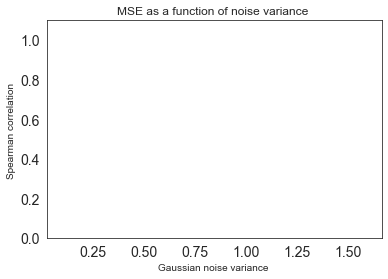

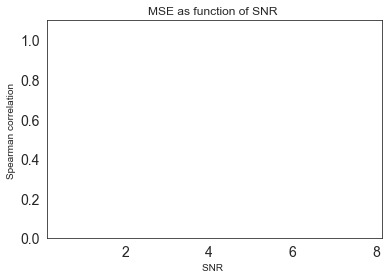

In [14]:
noise_list =[]
mse_list = []
nmse_list = []
prior_nmse_list = []
prior_mse_list = []
snr_list = []
T = simulate_spatial_cyclic(ngenes=500,ncells=100,w=0.3)
t_norm = np.linalg.norm(T)
for i in range(150):
        print("Iteration number: " + str(i))
        noise = np.random.normal(0,  0.1 + i*0.01,(T.shape))
        noise = np.clip(noise,a_max=np.inf,a_min=0)
        K = T + noise
        prior_mse = np.linalg.norm(K-T)
        prior_nmse = np.linalg.norm(K-T)/max(np.linalg.norm(K),np.linalg.norm(T))
        #E_sga  , E_rec_sga = sga_m_reorder_rows_matrix(K,iterNum=100,batch_size=90)
        #res = spearm(E_rec_sga,np.array(range(K.shape[0])))
        F = enhancement_cyclic(K,iterNum=300 ,regu=0.05)
        K = K * F
        mse = np.linalg.norm(K-T)
        nmse = mse/max(np.linalg.norm(K),np.linalg.norm(T))
        mse_list.append(mse)
        nmse_list.append(nmse)
        prior_mse_list.append(prior_mse)
        prior_nmse_list.append(prior_nmse)
        print(mse)
        noise_list.append( 0.1 + i*0.01)
        noise_norm = np.linalg.norm(noise)
        snr = t_norm/noise_norm
        snr_list.append(snr)
plt.plot(noise_list,mse_list, 'bo', noise_list,mse_list, 'k')
plt.title("MSE as a function of noise variance ")
plt.xlabel("Gaussian noise variance ")
plt.ylabel("Spearman correlation ")
plt.tick_params(labelsize=14)
plt.ylim(0, 1.1)
plt.show()
plt.plot(snr_list,mse_list, 'bo', snr_list,mse_list, 'k')
plt.title("MSE as function of SNR ")
plt.xlabel("SNR ")
plt.ylabel("Spearman correlation ")
plt.tick_params(labelsize=14)
plt.ylim(0, 1.1)
plt.show()

/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_10060/3223942777.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot((np.array(snr_list[10:])),(np.array(prior_nmse_list[10:])), 'bo',color='g' ,label='NMSE before enhancement')
/var/folders/yk/yt973zks3y50tkwcqhndwqrm0000gn/T/ipykernel_10060/3223942777.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  ax.plot((np.array(snr_list[10:])),(np.array(nmse_list[10:])), 'bo',color='r' , label='NMSE after enhancement')


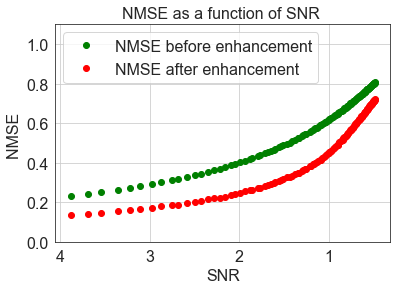

In [15]:


fig, ax = plt.subplots()

ax.plot((np.array(snr_list[10:])),(np.array(prior_nmse_list[10:])), 'bo',color='g' ,label='NMSE before enhancement')
#ax.plot( (np.array(snr_list[10:])),savgol_filter(np.array((np.array(nmse_list[10:]))),17,3), 'k', linewidth=5.0)
ax.plot((np.array(snr_list[10:])),(np.array(nmse_list[10:])), 'bo',color='r' , label='NMSE after enhancement')

ax.set_xlabel("SNR",  fontsize=16)
ax.set_ylabel("NMSE ",  fontsize=16)
ax.set_title("NMSE as a function of SNR ",  fontsize=16)
plt.tick_params(labelsize=16)
ax.grid(True)
ax.invert_xaxis()
plt.legend(fontsize=16)
plt.ylim(0, 1.1)
plt.show()


In [16]:
mse_list_linear = []
mse_list_cyclic = []
mse_list_en = []
mse_list_filtered = []

for i in range(100):
    print ("Iteration number: " +str(i))
    B = simulate_window_linear(ngenes=500,ncells=200,w=0.2) #Create linear signal
    B = gene_normalization(B)
    E  , perm = get_perm(B.shape[0]) #Store the true permutation of the linear signal
    B = E.dot(B)
    perm = Perm_to_range(E)
    A = simulate_spatial_cyclic(ngenes=500,ncells=B.shape[0],w=0.2) #Create cyclic signal
    A = gene_normalization(A)
    noise = np.random.normal(0,1e-2,A.shape)
    noise = np.clip(noise,a_max=np.inf,a_min=0)
    C = A + B
    C = C + noise
    E , E_rec = reconstruction_cyclic(C,iterNum=150 , verbose=False) #Reconstruction
    C = E_rec.dot(C)
    A = E_rec.dot(A)
    B = E_rec.dot(B)
    mse_list_cyclic.append(np.linalg.norm(C-A)) #Pre enhancement MSE
    mse_list_linear.append(np.linalg.norm(C-B)) #Pre Filtering MSE
    F = enhancement_cyclic(C,regu=1e-1 , iterNum=100 , verbosity=1000)
    D = F*C
    F = filtering_cyclic(C,regu=5e-3, iterNum=1000 , verbosity=1000)
    K = F*C
    mse_list_en.append(np.linalg.norm(D-A)) #Post enhancement MSE
    mse_list_filtered.append(np.linalg.norm(K-B)) #Post Filtering MSE



Iteration number: 0
Iteration number: 
1
function value: 
1280.8010178208963
starting filtering
Iteration number: 1
Iteration number: 
1
function value: 
1130.1061608348757
starting filtering
Iteration number: 2
Iteration number: 
1
function value: 
1282.5027091909708
starting filtering
Iteration number: 3
Iteration number: 
1
function value: 
1292.4841209445674
starting filtering
Iteration number: 4
Iteration number: 
1
function value: 
1102.5195438921085
starting filtering
Iteration number: 5
Iteration number: 
1
function value: 
1271.5001232251232
starting filtering
Iteration number: 6
Iteration number: 
1
function value: 
1256.343296302023
starting filtering
Iteration number: 7
Iteration number: 
1
function value: 
1252.4159369678496
starting filtering
Iteration number: 8
Iteration number: 
1
function value: 
1240.2547937694756
starting filtering
Iteration number: 9
Iteration number: 
1
function value: 
1241.5634449034055
starting filtering
Iteration number: 10
Iteration number: 
1

Iteration number: 85
Iteration number: 
1
function value: 
1041.6459764817785
starting filtering
Iteration number: 86
Iteration number: 
1
function value: 
1231.3480672498524
starting filtering
Iteration number: 87
Iteration number: 
1
function value: 
1257.4619131014786
starting filtering
Iteration number: 88
Iteration number: 
1
function value: 
1245.5719322050945
starting filtering
Iteration number: 89
Iteration number: 
1
function value: 
1275.680990511352
starting filtering
Iteration number: 90
Iteration number: 
1
function value: 
1246.0320301505367
starting filtering
Iteration number: 91
Iteration number: 
1
function value: 
1204.797566078851
starting filtering
Iteration number: 92
Iteration number: 
1
function value: 
1181.7731990456766
starting filtering
Iteration number: 93
Iteration number: 
1
function value: 
1258.6639416837322
starting filtering
Iteration number: 94
Iteration number: 
1
function value: 
1254.3115902961536
starting filtering
Iteration number: 95
Iteration n

MSE cyclic- 22.911237503602617
MSE lin- 23.028678216079072
Cyclic signal norm- 22.36067977499796
linear signal norm- 22.31591360442144
Noise signal norm- 2.239406824150886
Cyclic signal norm- 34.99085335171011
Iteration number: 
1
function value: 
1287.3872344035558
Iteration number: 
26
function value: 
1538.321066371224
Iteration number: 
51
function value: 
1809.5891252691783
Iteration number: 
76
function value: 
1945.207884189268
12.625513096687477
17.91028571710946
starting filtering
25
th Iteration    Loss :: 
30.427473459676982
50
th Iteration    Loss :: 
29.829086768606857
Enhanced signal norm- 29.27151653394289
MSE en- 12.625513096687477
Filtered signal norm- 21.016074633789966
MSE filtered- 13.278872667788047


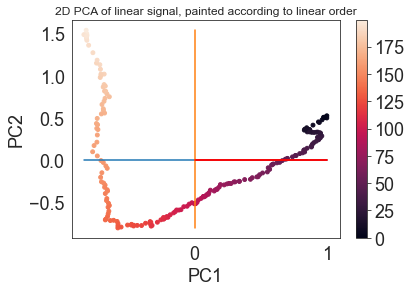

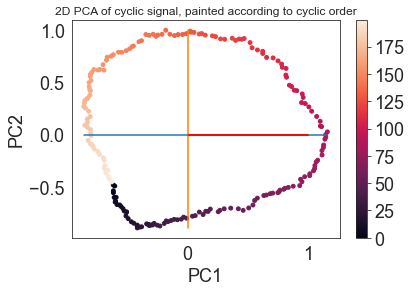

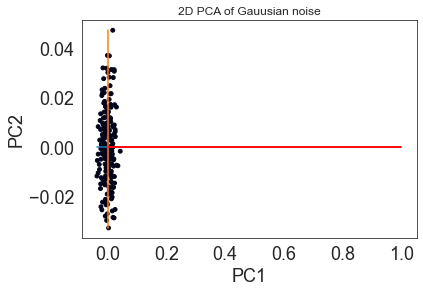

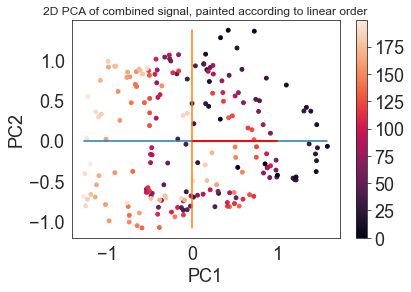

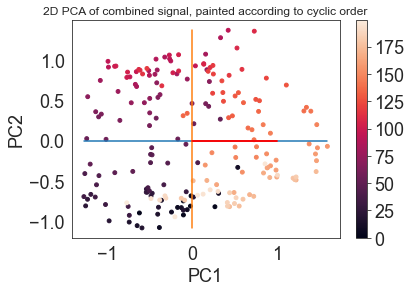

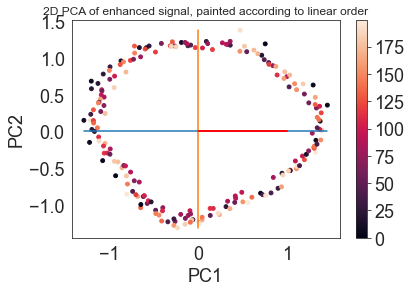

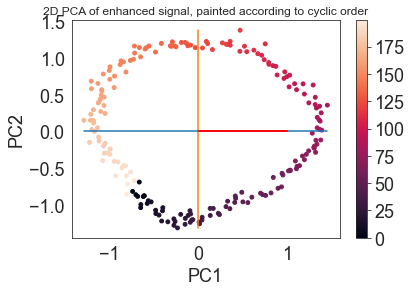

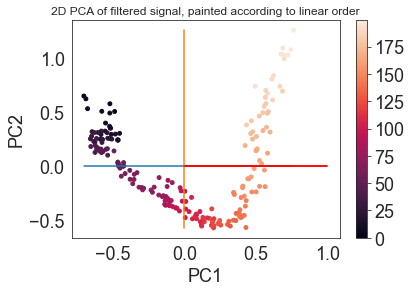

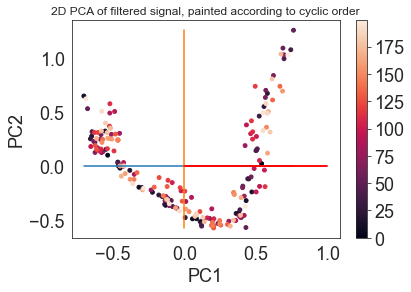

In [17]:


B = simulate_window_linear(ngenes=500,ncells=200,w=0.2) #Create linear signal
B = gene_normalization(B)
E  , perm = get_perm(B.shape[0])
B = E.dot(B)
perm = Perm_to_range(E)
A = simulate_spatial_cyclic(ngenes=500,ncells=B.shape[0],w=0.2) #Create cyclic signal
A = gene_normalization(A)
noise = np.random.normal(0,1e-2,A.shape)
noise = np.clip(noise,a_max=np.inf,a_min=0)
C = A + B
C = C + noise

print("MSE cyclic- " + str(np.linalg.norm(C-A))) #Pre enhancement MSE
print("MSE lin- " + str(np.linalg.norm(C-B))) #Pre Filtering MSE
print("Cyclic signal norm- " + str(np.linalg.norm(A)))
print("linear signal norm- " + str(np.linalg.norm(B)))
print("Noise signal norm- " + str(np.linalg.norm(noise)))
print("Cyclic signal norm- " + str(np.linalg.norm(C)))

F = enhancement_cyclic(C,regu=1e-1 , iterNum=100)
D = F*C

print(np.linalg.norm(A-D)) 
print(np.linalg.norm(C-D)) 
F = filtering_cyclic(C,regu=5e-3, iterNum=2500)
K = F*C

print("Enhanced signal norm- " + str(np.linalg.norm(D)))
print("MSE en- " + str(np.linalg.norm(D-A))) #Post enhancement MSE
print("Filtered signal norm- " + str(np.linalg.norm(K)))
print("MSE filtered- " + str(np.linalg.norm(K-B))) #Post filtering MSE
    
ranged_pca_2d(B,perm,title="2D PCA of linear signal, painted according to linear order")
ranged_pca_2d(A,range(A.shape[0]),title="2D PCA of cyclic signal, painted according to cyclic order")
ranged_pca_2d(noise,np.ones(noise.shape[0]),title="2D PCA of Gauusian noise",dis_colorbar=True)
ranged_pca_2d(C,perm,title="2D PCA of combined signal, painted according to linear order")
ranged_pca_2d(C,range(A.shape[0]),title="2D PCA of combined signal, painted according to cyclic order")
ranged_pca_2d(D,perm,title="2D PCA of enhanced signal, painted according to linear order")
ranged_pca_2d(D,range(A.shape[0]),title="2D PCA of enhanced signal, painted according to cyclic order")
ranged_pca_2d(K,perm,title="2D PCA of filtered signal, painted according to linear order")
ranged_pca_2d(K,range(A.shape[0]),title="2D PCA of filtered signal, painted according to cyclic order")
plt.show()


In [18]:
mse_list_linear1 = []
mse_list_cyclic1 = []
mse_list_en1 = []
mse_list_filtered1 = []

for i in range(100):
    print ("Iteration number: " +str(i))
    B = simulate_window_linear(ngenes=500,ncells=200,w=0.2) #Create linear signal
    B = cell_normalization(B)
    E  , perm = get_perm(B.shape[0])
    B = E.dot(B)
    perm = Perm_to_range(E)
    A = simulate_spatial_cyclic(ngenes=500,ncells=B.shape[0],w=0.2) #Create cyclic signal
    A = cell_normalization(A)
    noise = np.random.normal(0,1e-2,A.shape)
    noise = np.clip(noise,a_max=np.inf,a_min=0)
    C = A + B
    C = C + noise
    C = cell_normalization(C)
    F = enhancement_cyclic(C,regu=1e-1 , iterNum=100 , verbosity=2500)
    D = F*C
    D = cell_normalization(D)
    F = filtering_cyclic(C,regu=5e-3, iterNum=2500, verbosity=2500)
    K = F*C
    K = cell_normalization(K)
    mse_list_linear1.append(np.linalg.norm(C-B)) #Pre Filtering MSE
    mse_list_cyclic1.append(np.linalg.norm(C-A))  #Pre enhancement MSE
    mse_list_en1.append(np.linalg.norm(D-A)) #Post enhancement MSE
    mse_list_filtered1.append(np.linalg.norm(K-B)) #Post Filtering MSE



Iteration number: 0
Iteration number: 
1
function value: 
1192.660710540642
starting filtering
Iteration number: 1
Iteration number: 
1
function value: 
1200.5231306720098
starting filtering
Iteration number: 2
Iteration number: 
1
function value: 
1204.4927818212852
starting filtering
Iteration number: 3
Iteration number: 
1
function value: 
1214.8511674445579
starting filtering
Iteration number: 4
Iteration number: 
1
function value: 
1200.1749845627835
starting filtering
Iteration number: 5
Iteration number: 
1
function value: 
1206.7241576830095
starting filtering
Iteration number: 6
Iteration number: 
1
function value: 
1200.850870760718
starting filtering
Iteration number: 7
Iteration number: 
1
function value: 
1226.8531584971165
starting filtering
Iteration number: 8
Iteration number: 
1
function value: 
1196.7056502966163
starting filtering
Iteration number: 9
Iteration number: 
1
function value: 
1213.97321243934
starting filtering
Iteration number: 10
Iteration number: 
1
fu

Iteration number: 85
Iteration number: 
1
function value: 
1215.9184624472855
starting filtering
Iteration number: 86
Iteration number: 
1
function value: 
1206.5489219410274
starting filtering
Iteration number: 87
Iteration number: 
1
function value: 
1199.2858914486098
starting filtering
Iteration number: 88
Iteration number: 
1
function value: 
1204.533870787783
starting filtering
Iteration number: 89
Iteration number: 
1
function value: 
1202.609786654553
starting filtering
Iteration number: 90
Iteration number: 
1
function value: 
1206.4850153376653
starting filtering
Iteration number: 91
Iteration number: 
1
function value: 
1219.246115712933
starting filtering
Iteration number: 92
Iteration number: 
1
function value: 
1214.0657590128947
starting filtering
Iteration number: 93
Iteration number: 
1
function value: 
1199.6355328155587
starting filtering
Iteration number: 94
Iteration number: 
1
function value: 
1196.784775502628
starting filtering
Iteration number: 95
Iteration num

In [19]:
#data = pd.DataFrame(
#{'Linear signal': mse_list_linear,
#'Cyclic signal': mse_list_cyclic,
# 'Enhanced signal': mse_list_en,
# 'Filteered signal': mse_list_filtered
#})
#print(data.head())
#sns.violinplot(data=data)
with open('simulated/mse_en_rec.npy', 'wb') as f:
    np.save(f,np.array(mse_list_en))
with open('simulated/mse_filtered_rec.npy', 'wb') as f:
    np.save(f,np.array(mse_list_filtered))
with open('simulated/mse_linear.npy', 'wb') as f:
    np.save(f,np.array(mse_list_linear))
with open('simulated/mse_cyclic.npy', 'wb') as f:
    np.save(f,np.array(mse_list_cyclic))
with open('simulated/mse_en_gt.npy', 'wb') as f:
    np.save(f,np.array(mse_list_en1))
with open('simulated/mse_filtered_gt.npy', 'wb') as f:
    np.save(f,np.array(mse_list_filtered1))



22.62282828939959Mean mse_cyclum_en
18.017700441591117Mean mse_cyclum_filtered
13.942006715375701Mean mse_en_rec
14.37098936423399Mean mse_filtered_rec
5.853284485074891Mean mse_en_gt
8.815050286440972Mean mse_filtered_gt
23.027422378771465Mean mse_linear
22.925825956997965Mean mse_cyclic


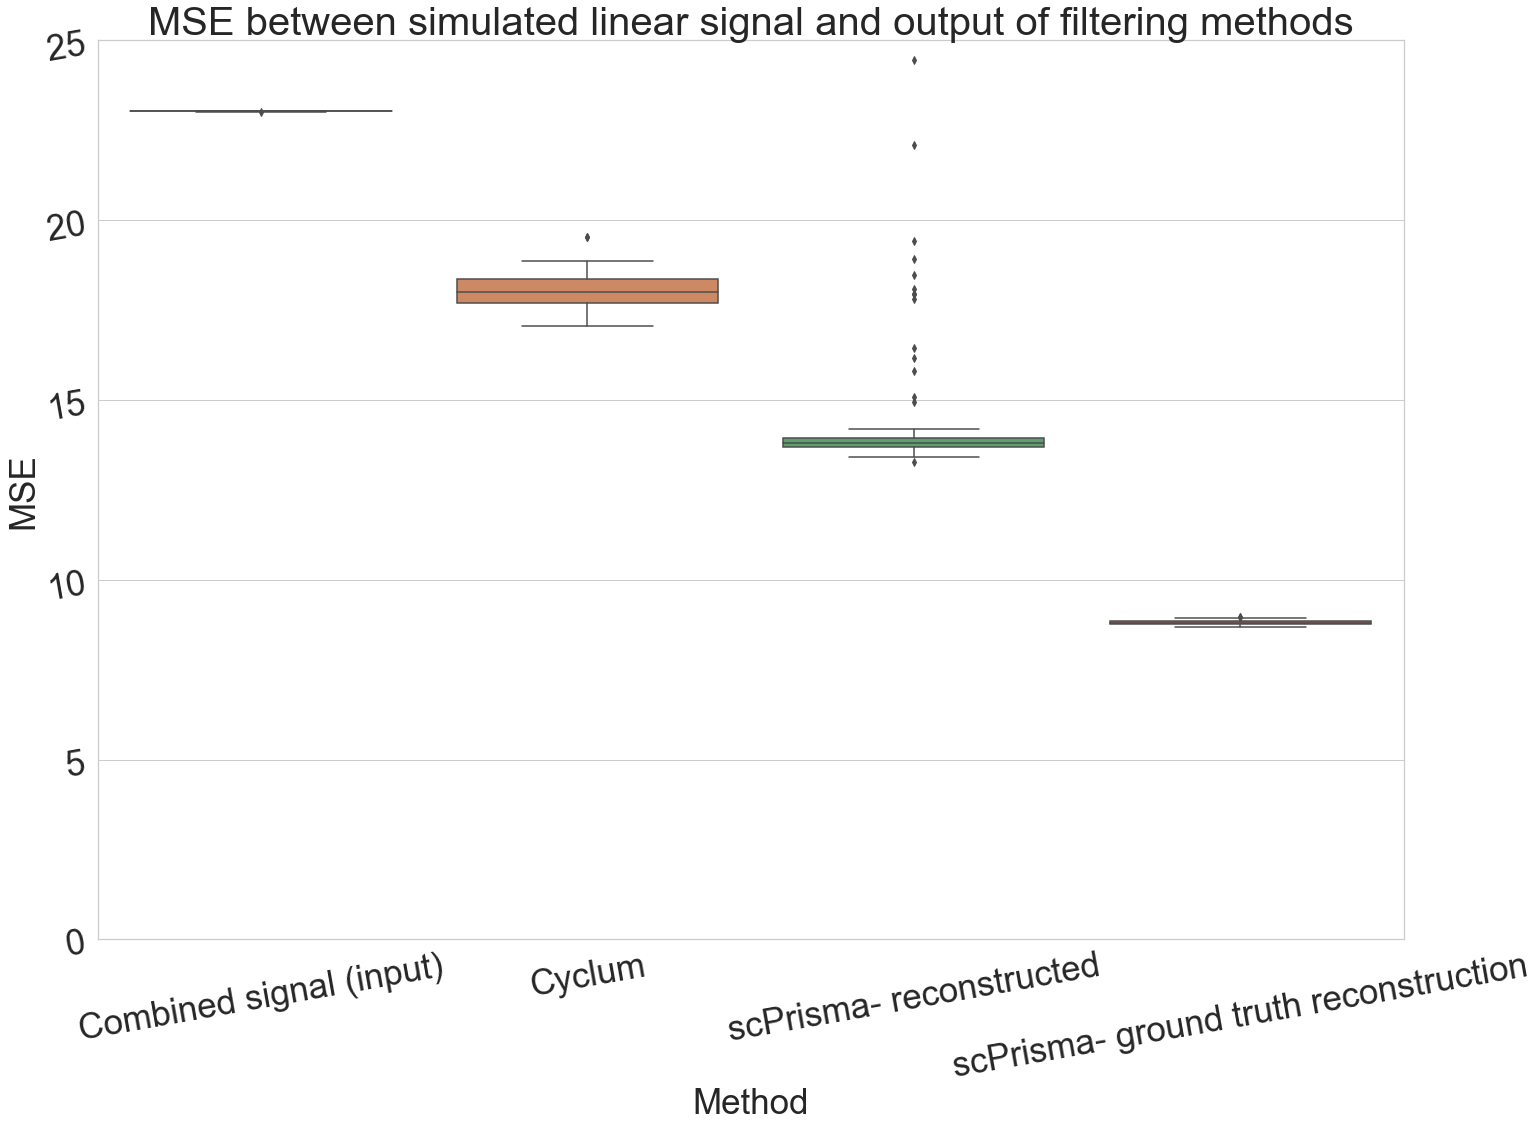

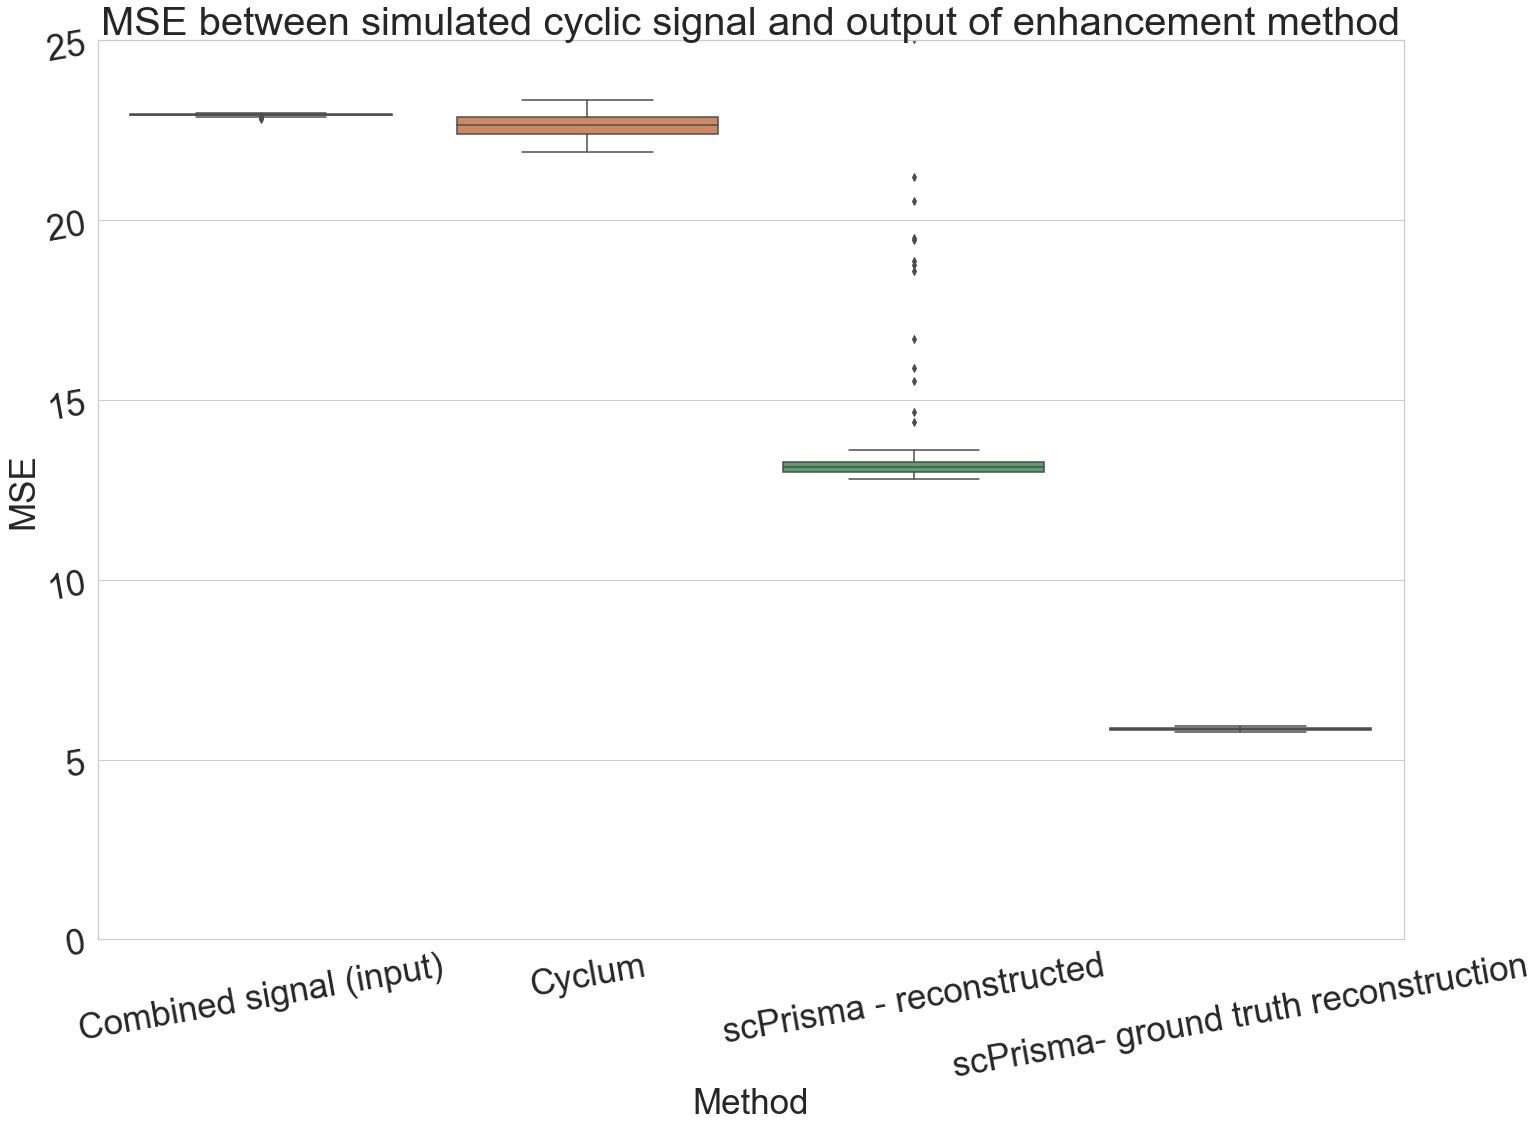

In [20]:
mse_cyclum_en = np.load("simulated/mse_list_en_cyclum.npy")
print(str(np.mean(mse_cyclum_en)) + "Mean mse_cyclum_en")
mse_cyclum_filtered = np.load("simulated/mse_list_filtered_cyclum.npy")
print(str(np.mean(mse_cyclum_filtered)) + "Mean mse_cyclum_filtered")
mse_en_rec = np.load("simulated/mse_en_rec.npy")
print(str(np.mean(mse_en_rec)) + "Mean mse_en_rec")
mse_filtered_rec = np.load("simulated/mse_filtered_rec.npy")
print(str(np.mean(mse_filtered_rec)) + "Mean mse_filtered_rec")
mse_en_gt = np.load("simulated/mse_en_gt.npy")
print(str(np.mean(mse_en_gt)) + "Mean mse_en_gt")
mse_filtered_gt = np.load("simulated/mse_filtered_gt.npy")
print(str(np.mean(mse_filtered_gt)) + "Mean mse_filtered_gt")
mse_linear = np.load("simulated/mse_linear.npy")
print(str(np.mean(mse_linear)) + "Mean mse_linear")
mse_cyclic = np.load("simulated/mse_cyclic.npy")
print(str(np.mean(mse_cyclic)) + "Mean mse_cyclic")
sns.set(rc={'figure.figsize':(23.4,16.54)})

data_linear = pd.DataFrame(
{'Combined signal (input)': mse_linear,
'Cyclum': mse_cyclum_filtered,
 'scPrisma- reconstructed': mse_filtered_rec,
 'scPrisma- ground truth reconstruction': mse_filtered_gt
})
sns.set_style("whitegrid")

b = sns.boxplot(data=data_linear)
sns.set(rc={'figure.figsize':(23.4,16.54)})
b.axes.set_title("MSE between simulated linear signal and output of filtering methods",fontsize=40)
b.set_xlabel("Method",fontsize=35)
b.set_ylabel("MSE",fontsize=35)
b.tick_params(rotation=10,labelsize=35)
plt.ylim(0, 25)

#plt.xlabel("Method")
#plt.ylabel("MSE")
#plt.title("MSE between simulated linear signal and output of filtering methods",fontsize='24')
plt.show()
data_cyclic= pd.DataFrame(
{'Combined signal (input)': mse_cyclic,
'Cyclum': mse_cyclum_en,
 'scPrisma - reconstructed': mse_en_rec,
 'scPrisma- ground truth reconstruction': mse_en_gt
})
sns.set_style("whitegrid")

b = sns.boxplot(data=data_cyclic)
#b.axes.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set(rc={'figure.figsize':(23.4,16.54)})
b.axes.set_title("MSE between simulated cyclic signal and output of enhancement method",fontsize=40)
b.set_xlabel("Method",fontsize=35)
b.set_ylabel("MSE",fontsize=35)
b.tick_params(rotation=10,labelsize=35)
#b.axes.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.ylim(0, 25)


sns.set(rc={'figure.figsize':(23.4,16.54)})
#plt.title("MSE between simulated cyclic signal and output of enhancement methods" ,fontsize='24')

sns.set_style("whitegrid")

plt.show()

In [ ]:
a=1/0

In [ ]:
noise_list =[]
mse_list = []
nmse_list = []
prior_nmse_list = []
prior_mse_list = []
snr_list = []
T = simulate_window_linear(ngenes=500,ncells=100,w=0.3)
t_norm = np.linalg.norm(T)
for i in range(150):
        print("Iteration number: " + str(i))
        noise = np.random.normal(0,  0.1 + i*0.01,(T.shape))
        noise = np.clip(noise,a_max=np.inf,a_min=0)
        K = T + noise
        prior_mse = np.linalg.norm(K-T)
        prior_nmse = np.linalg.norm(K-T)/max(np.linalg.norm(K),np.linalg.norm(T))
        #E_sga  , E_rec_sga = sga_m_reorder_rows_matrix(K,iterNum=100,batch_size=90)
        #res = spearm(E_rec_sga,np.array(range(K.shape[0])))
        F = enhance_linear_full(K,iterNum=500 ,regu=0.7 , method='numeric')
        K = K * F
        mse = np.linalg.norm(K-T)
        nmse = mse/max(np.linalg.norm(K),np.linalg.norm(T))
        mse_list.append(mse)
        nmse_list.append(nmse)
        prior_mse_list.append(prior_mse)
        prior_nmse_list.append(prior_nmse)
        print(mse)
        noise_list.append( 0.1 + i*0.01)
        noise_norm = np.linalg.norm(noise)
        snr = t_norm/noise_norm
        snr_list.append(snr)
plt.plot(noise_list,mse_list, 'bo', noise_list,mse_list, 'k')
plt.title("MSE as a function of noise variance ")
plt.xlabel("Gaussian noise variance ")
plt.ylabel("Spearman correlation ")
plt.show()
plt.plot(snr_list,mse_list, 'bo', snr_list,mse_list, 'k')
plt.title("MSE as function of SNR ")
plt.xlabel("SNR ")
plt.ylabel("Spearman correlation ")
plt.show()



fig, ax = plt.subplots()

ax.plot((np.array(snr_list[10:])),(np.array(nmse_list[10:])), 'bo',color='y' ,label='NMSE before enhancement')
#ax.plot( (np.array(snr_list[10:])),savgol_filter(np.array((np.array(nmse_list[10:]))),17,3), 'k', linewidth=5.0)
ax.plot((np.array(snr_list[10:])),(np.array(prior_nmse_list[10:])), 'bo',color='purple' , label='NMSE after enhancement')

ax.set_xlabel("SNR")
ax.set_ylabel("NMSE ")
ax.set_title("NMSE as a function of SNR ")
ax.grid(True)
ax.invert_xaxis()
plt.legend(fontsize=16)
plt.show()


fig, ax = plt.subplots()

ax.plot((np.array(snr_list)),(np.array(nmse_list)), 'bo',color='y' ,label='NMSE before enhancement')
#ax.plot( (np.array(snr_list[10:])),savgol_filter(np.array((np.array(nmse_list[10:]))),17,3), 'k', linewidth=5.0)
ax.plot((np.array(snr_list)),(np.array(prior_nmse_list)), 'bo',color='purple' , label='NMSE after enhancement')

ax.set_xlabel("SNR")
ax.set_ylabel("NMSE ")
ax.set_title("Linear - NMSE as a function of SNR ")
ax.grid(True)
ax.invert_xaxis()
plt.legend(fontsize=16)
plt.show()






In [ ]:
def cyclum_for_simulated():
    mse_list_linear1 = []
    mse_list_cyclic1 = []
    mse_list_en1 = []
    mse_list_filtered1 = []

    for i in range(100):
        print("Iteration number: " + str(i))
        B = simulate_window_linear(ngenes=500, ncells=200, w=0.1)  # Create linear signal
        B = cell_normalization(B)
        E, perm = get_perm(B.shape[0])
        B = E.dot(B)
        perm = Perm_to_range(E)
        A = simulate_spatial_cyclic(ngenes=500, ncells=B.shape[0], w=0.1)  # Create cyclic signal
        A = cell_normalization(A)
        A = np.clip(A, a_max=1, a_min=0)
        B = np.clip(B, a_max=1, a_min=0)
        noise = np.random.normal(0, 1e-2, A.shape)
        noise = np.clip(noise, a_max=np.inf, a_min=0)
        C = A + B
        C = C + noise
        C = cell_normalization(C)
        model = cyclum.tuning.CyclumAutoTune(C, max_linear_dims=5,
                                             epochs=300, rate=2e-4, verbose=100,
                                             encoder_width=[20, 30])  # 30,20
        model.train(C, epochs=800, verbose=100, rate=2e-4)
        pseudotime = model.predict_pseudotime(C)
        D = model.get_circular_component(pseudotime)
        K = C - D
        D = cell_normalization(D)
        K = cell_normalization(K)
        mse_list_linear1.append(np.linalg.norm(C - B))  # Pre Filtering MSE
        mse_list_cyclic1.append(np.linalg.norm(C - A))  # Pre enhancement MSE
        mse_list_en1.append(np.linalg.norm(D - A))  # Post enhancement MSE
        mse_list_filtered1.append(np.linalg.norm(K - B))  # Post Filtering MSE
        with open('mse_list_en_cyclum.npy', 'wb') as f:
            np.save(f, np.array(mse_list_en1))
        with open('mse_list_filtered_cyclum.npy', 'wb') as f:
            np.save(f, np.array(mse_list_filtered1))
